# Predicting the sell Price of Bulldozers using Machine Learning
> In this Lab Assignment, i'm going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

![title](photo.png)


# Task 1: Creating a data set
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data
>Kaggle is the world's largest data science community with powerful tools and resources to help you achieve your data science goals. I have choosen data from kaggle because i have done many experiment with this source. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.




### 1. Problem defition
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

### 2. Evaluation
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

>For more on the evaluation of this project check out this link: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation


### 3. Features
>This data source have another features of data dictionary detailing all of the features of the dataset. You can view this data dictionary if you confuse about this work: https://genesecloud-my.sharepoint.com/:x:/g/personal/bikash_subediai_genesecloudacademy_edu_np/EbXyqnTALG9LmuGdTbXY_isBtKP0GHz0uADRL35dJSdqGg?e=1Om3vq



In [2]:
#Importing Useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# ML Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Import Validation and Training set
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

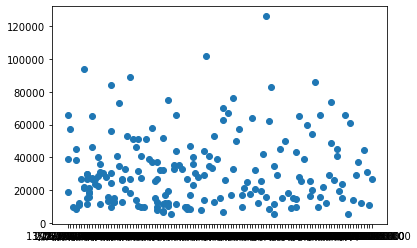

In [6]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:200], df['SalePrice'][:200]);

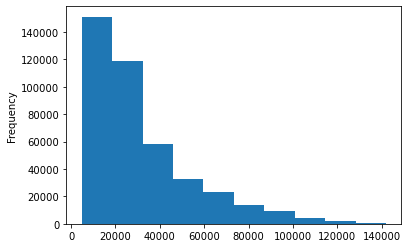

In [7]:
df.SalePrice.plot.hist();

In [8]:
df.saledate.dtype

dtype('O')

# Task 2: Preparing the data

### Sale date is `object` so i'm going to parsing the data using pandas

In [9]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [10]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Woderful, now the sale date is in `datetime format`

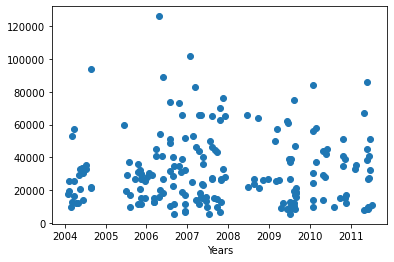

In [11]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:200], df['SalePrice'][:200]);
plt.xlabel('Years');

### Its looks clean than the previous one

# Sorting DataFrame by date

> Help link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [12]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head(5)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

# Copying from Original Dataframe

> It's good to copy and work with copied data because if something wrong then we can try new one

In [13]:
df_copy = df.copy()

In [14]:
df_copy.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


# Adding Datetime parameters for `saledate column`

>help link: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

In [15]:
df_copy['saleYear'] = df_copy.saledate.dt.year
df_copy['saleMonth'] = df_copy.saledate.dt.month
df_copy['saleDay'] = df_copy.saledate.dt.day
df_copy['saleDayOfYear'] = df_copy.saledate.dt.dayofyear
df_copy['saleDayOfWeek'] = df_copy.saledate.dt.dayofweek

In [16]:
df_copy.head(2).T

,205615,274835
SalesID,1646770,1821514
SalePrice,9500,14000
MachineID,1126363,1194089
ModelID,8434,10150
datasource,132,132
auctioneerID,18,99
YearMade,1974,1980
MachineHoursCurrentMeter,NaN,NaN
UsageBand,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00


## Here 5 columns are added in dataframe, so lets delete saledate because we don't need saledate in upcomming process

In [17]:
df_copy.drop('saledate', axis=1, inplace=True)


#### first we need to find all the string in columns
>Help Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.types.is_object_dtype.html

In [18]:
# Finding columns that contains strings
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
# Let;s change string values into category values
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype('category').cat.as_ordered()

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

### Interesting, Now all the string values are changed to category, by this we can access all the data in the form of numbers

# Working With Missing Values

In [21]:
df_copy.isnull().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save the Entire Process

In [22]:
# Exporting the current progress in csv file
df_copy.to_csv('data/train_copy.csv', index=False)

In [23]:
# Exporting the current progress in csv file
df_copy = pd.read_csv('data/train_copy.csv', low_memory=False)

## filling missing numerical values

>Help Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.types.is_numeric_dtype.html

In [24]:
#which columns contains numeric
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfYear
saleDayOfWeek


In [25]:
# which columns have null nuremic value
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [26]:
# filling the two columns
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #creating new column that have missing value
            df_copy[label+'_is_missing'] = pd.isnull(content)
            #filling with median value
            df_copy[label] = content.fillna(content.median())

In [27]:
#Confirming that there is no any nul values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

>Greate no any null numeric

## filling missing categorical values into numbers

In [28]:
#Checking which are not numeric
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [29]:
# turning categorical value into numbers and fill null
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #creating new column that have missing value
        df_copy[label+'_is_missing'] = pd.isnull(content)
        #filling with median value
        df_copy[label] = pd.Categorical(content).codes + 1

In [30]:
df_copy.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [31]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

>Greate no any null values

# Task 3: Modeling


In [32]:
len(df_copy)

412698

### there is 412698 so, our model have to go through higher than this value

> Help Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#



In [34]:
%%time
#Instiatate model
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

#Fit the model
model.fit(df_copy.drop('SalePrice', axis=1), df_copy['SalePrice'])

CPU times: user 1min 38s, sys: 2.63 s, total: 1min 41s
Wall time: 1min 39s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [35]:
#Score teh Model
model.score(df_copy.drop('SalePrice', axis=1), df_copy['SalePrice'])

0.860427994558177

# Splitting data into train/validation sets

In [36]:
df_copy.saleYear.head(10)

0    1989
1    1989
2    1989
3    1989
4    1989
5    1989
6    1989
7    1989
8    1989
9    1989
Name: saleYear, dtype: int64

In [37]:
df_copy.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [57]:
# Split data into validation
df_val = df_copy[df_copy.saleYear == 2012]

# Split data into training
df_train = df_copy[df_copy.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [58]:
# labeling to X and Y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [59]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

# Developing Evaluation Function

### let's use  RMSLE

>Help Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

In [67]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores



>MAE = Mean Absoluate Error

# Testing our Created Model

In [68]:
len(X_train)

401125

In [69]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [70]:
(X_train.shape[0] * 100) / 1000000

40.1125

In [71]:
10000 * 100

1000000

In [72]:
show_scores(model)

{'Training MAE': 5561.138281258958,
 'Valid MAE': 7171.251002333016,
 'Training RMSLE': 0.2577410303930966,
 'Valid RMSLE': 0.2930925556053619,
 'Training R^2': 0.860649958144041,
 'Valid R^2': 0.832162894701184}

# Hyperparameters tuning with RandomizedSearchCV

>Help Link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [73]:
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid, n_iter=2, cv=5, verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [74]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 12,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [75]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6580.059708992138,
 'Valid MAE': 7893.123879432529,
 'Training RMSLE': 0.2954814530302364,
 'Valid RMSLE': 0.31819292894198714,
 'Training R^2': 0.8096254437511293,
 'Valid R^2': 0.7969760432884119}

# Time to Train The Model

In [76]:
ideal_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, min_samples_split=14,max_features=0.5,n_jobs=-1,max_samples=None,random_state=42)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [77]:
# Scores for ideal_model
show_scores(ideal_model)

{'Training MAE': 2951.890756700501,
 'Valid MAE': 5969.165323345881,
 'Training RMSLE': 0.14462583722939487,
 'Valid RMSLE': 0.2466384125243309,
 'Training R^2': 0.9588959217158949,
 'Valid R^2': 0.8817109349545978}

# The Final Step of Lab Assignment: PREDICTION

In [97]:
# Import the test data
df_test = pd.read_csv("data/Test.csv",low_memory=False,parse_dates=["saledate"])

> I imported file with different name, but the data is same.The previous file is missmatched so i used second name

## Making The file as a same format of training dataset

>I have copied and pasted the same function here that ihave already done during training

In [99]:
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [103]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [104]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


## The Important steps:
### Train dataset have 102 columns and Test Dataset have 101 columns. So, i have to find out the extra one and must matched model n_features and input n_features

In [107]:
# analyzing differ columns
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [108]:
# managing n_features
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [110]:
# Predicting the test data
test_preds = ideal_model.predict(df_test)

test_preds

array([25536.4733144 , 20627.51999933, 53176.75900794, ...,
       17677.5035667 , 21397.40082222, 29904.13287392])

In [111]:
# Cleaning the format
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,25536.473314
1,1227844,20627.519999
2,1227847,53176.759008
3,1227848,60524.641690
4,1227863,52133.850301
...,...,...
12452,6643171,54673.809694
12453,6643173,14248.396949
12454,6643184,17677.503567
12455,6643186,21397.400822


In [113]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv", index=False)

# WOW, Prediction CSV files is saved sucessfully